<a href="https://colab.research.google.com/github/Ramon-Goveia/DataScience/blob/master/MLsaude.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Análise de Dados Multifacetada da Saúde: Exploração, Visualização e Previsão da Pressão Sanguínea com Machine Learning.


Esse projeto abrange uma análise completa de dados de saúde, desde a exploração inicial até a construção de um modelo de machine learning para prever a pressão sanguínea. Utilizando Python e bibliotecas como pandas, seaborn e scikit-learn, o código realiza limpeza, exploração e visualizações avançadas. Além disso, inclui a aplicação de uma transformação logarítmica, análises estatísticas por gênero e a criação de gráficos complexos. A modelagem de machine learning é realizada com um modelo de regressão linear, cujos resultados são avaliados e persistidos para uso futuro, incluindo uma visualização do boxplot e o modelo treinado.

O código abaixo gera dados fictícios relacionados à saúde, incluindo informações como idade, gênero, altura, peso, pressão, colesterol, hábito de fumar, prática de exercícios, diabetes, IMC e categoria de IMC. Esses dados são salvos em um arquivo CSV chamado 'dados_saude.csv'.

In [12]:
import pandas as pd
import numpy as np

np.random.seed(42)

n = 500

df = pd.DataFrame({
'idade': np.random.normal(40, 5, n).astype(int),
'genero': np.random.choice(['masc', 'fem'], n),
'altura': np.random.normal(1.70, 0.1, n).round(2),
'peso': np.random.normal(70, 15, n).round(2),
'pressao': np.random.normal(120, 5, n).astype(int),
'colesterol': np.random.normal(200, 25, n).round(2),
'fumante': np.random.choice([0, 1], n),
'exercicio': np.random.choice([0, 1], n),
'diabetes': np.random.choice([0, 1], n)
})

df['imc'] = df['peso'] / (df['altura']**2)

df['categoria_imc'] = pd.cut(df['imc'], bins=[0, 18.5, 25, 30, 100], labels=['baixo', 'normal', 'sobrepeso', 'obeso'])

df.to_csv('dados_saude.csv', index=False)

Este código realiza análise exploratória, modelagem e avaliação dos dados usando Pandas, Numpy, Matplotlib, Seaborn e Scikit-Learn.

As principais etapas são:

Explorar e limpar os dados: df.info(), df.describe()

Análise exploratória com gráficos de dispersão, matriz de correlação e agregações.

Visualizações avançadas como boxplots e gráficos lineares para relações entre variáveis.

Pré-processamento dos dados para modelo de regressão linear: codificação de variáveis categóricas, split treino/teste.

Treinamento de modelo de regressão linear e predição no conjunto de teste.

Avaliação do modelo: coeficientes, erro quadrático médio.

Visualização da distribuição de resíduos.

Salvamento das figuras e do modelo treinado para uso futuro.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   idade          500 non-null    int64   
 1   genero         500 non-null    object  
 2   altura         500 non-null    float64 
 3   peso           500 non-null    float64 
 4   pressao        500 non-null    int64   
 5   colesterol     500 non-null    float64 
 6   fumante        500 non-null    int64   
 7   exercicio      500 non-null    int64   
 8   diabetes       500 non-null    int64   
 9   imc            500 non-null    float64 
 10  categoria_imc  500 non-null    category
 11  imc_log        500 non-null    float64 
dtypes: category(1), float64(5), int64(5), object(1)
memory usage: 43.8+ KB


<ipython-input-14-6bf796d8244d>:22: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, 2, 2)


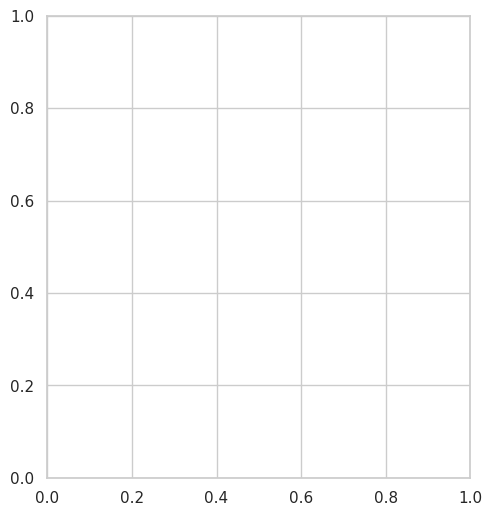

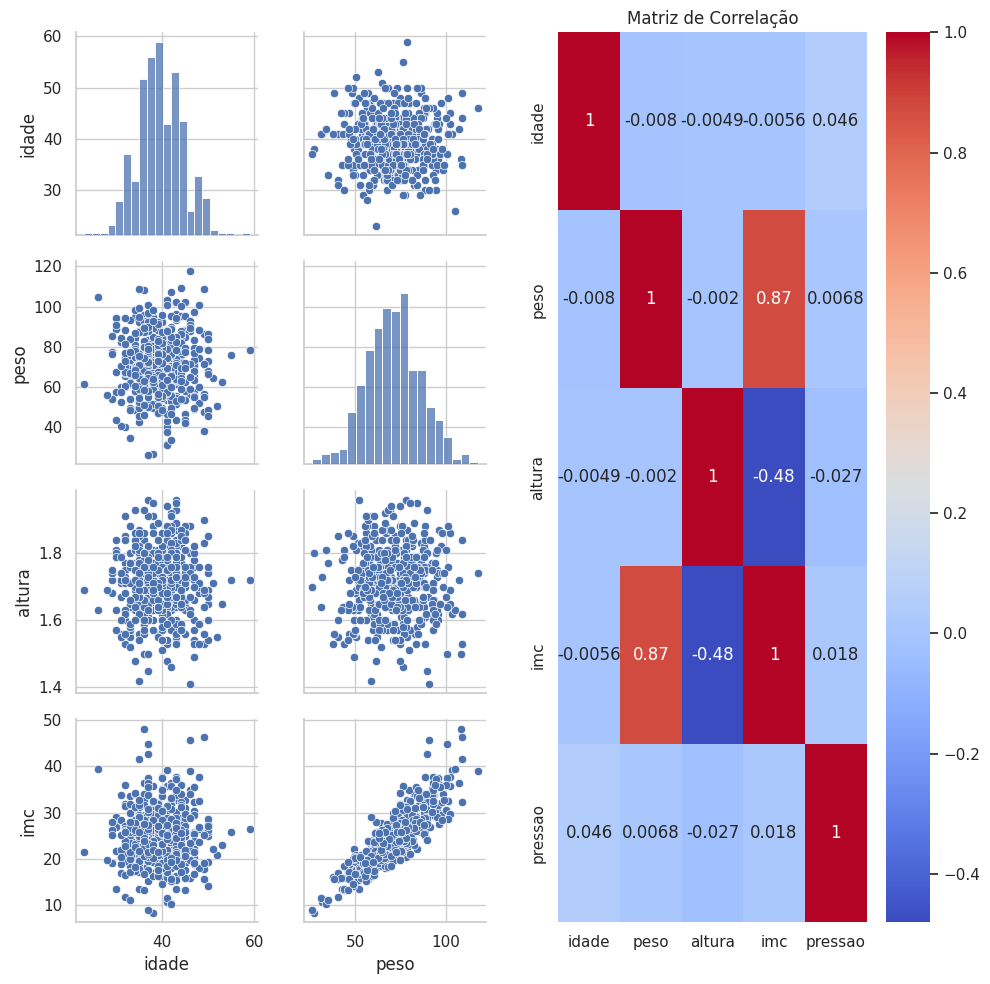

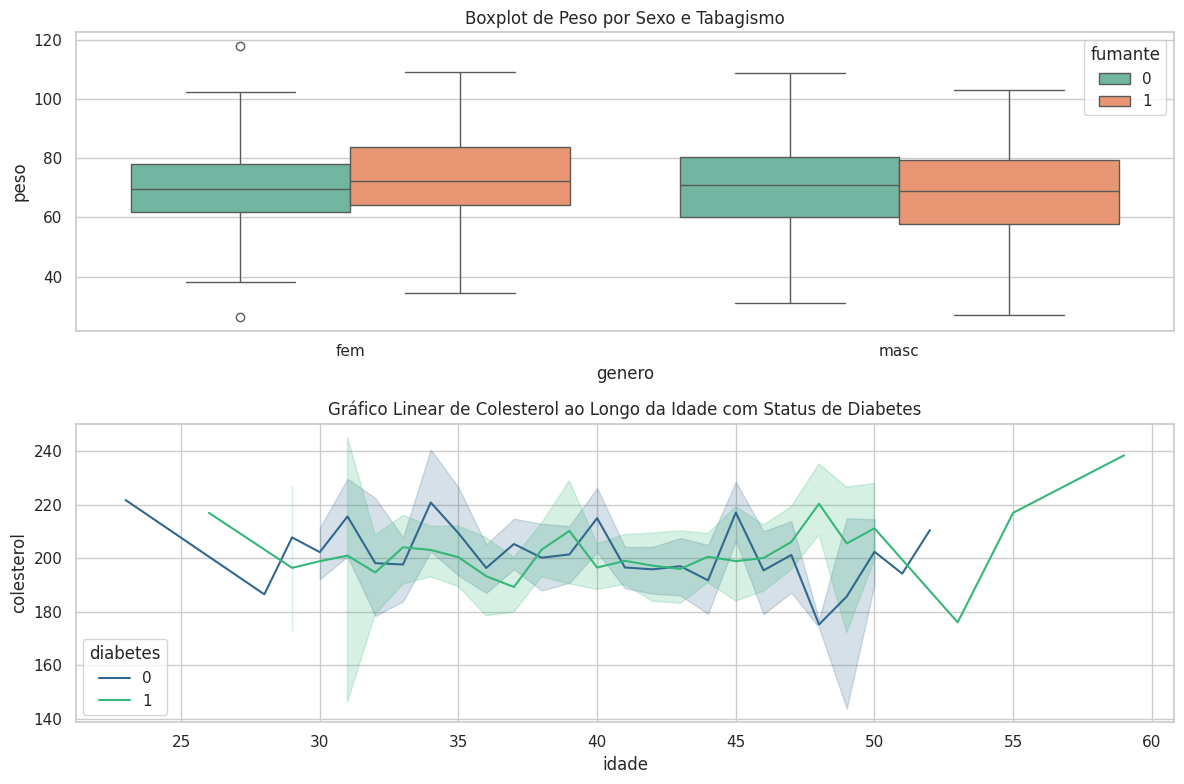

Coeficientes: [ 0.02719812 -0.00330706 -1.25579496  0.07064527 -0.07064527 -0.23471819
  0.23471819]
Erro quadrático médio: 4.422870320989528


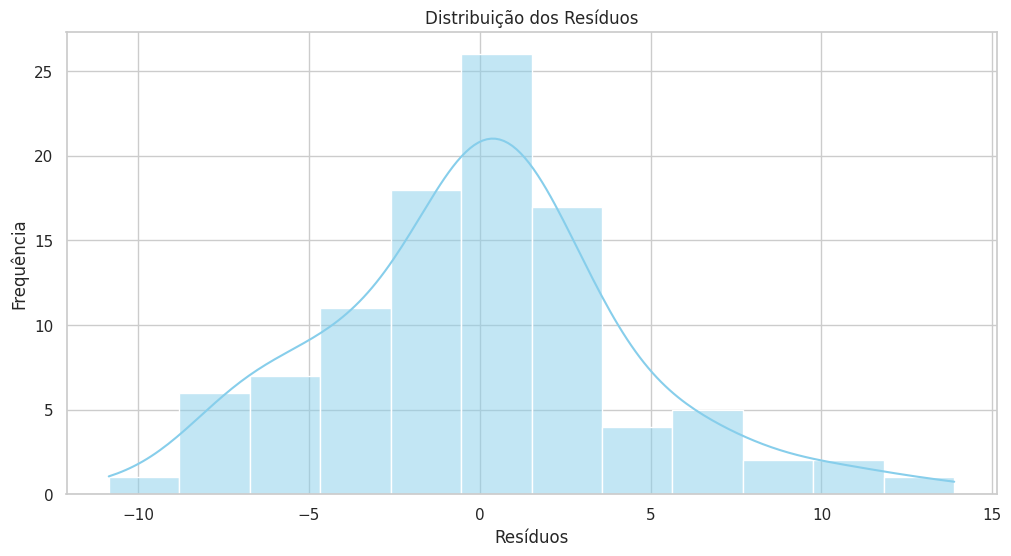

['modelo_pressao.joblib']

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import joblib

# Explorar e limpar os dados
df.info()
df.describe()

# Análise exploratória dos dados
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.pairplot(df[['idade', 'peso', 'altura', 'imc']])
plt.title('Relações entre Variáveis')

plt.subplot(1, 2, 2)
corr_matrix = df[['idade', 'peso', 'altura', 'imc', 'pressao']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlação')

plt.tight_layout()
plt.show()

# Agregações e transformações
df_agg = df.groupby('genero').agg({'idade': ['mean', 'max']})
df['imc_log'] = np.log(df['imc'])

# Visualizações avançadas
plt.figure(figsize=(12, 8))

plt.subplot(2, 1, 1)
sns.boxplot(data=df, x='genero', y='peso', hue='fumante', palette='Set2')
plt.title('Boxplot de Peso por Sexo e Tabagismo')

plt.subplot(2, 1, 2)
sns.lineplot(data=df, x='idade', y='colesterol', hue='diabetes', palette='viridis')
plt.title('Gráfico Linear de Colesterol ao Longo da Idade com Status de Diabetes')

plt.tight_layout()
plt.show()

# Modelos de Machine Learning
X = pd.get_dummies(df[['idade', 'peso', 'altura', 'genero', 'fumante']], columns=['genero', 'fumante'])
y = df['pressao']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)

# Resultados da Modelagem
print('Coeficientes:', lr.coef_)
print('Erro quadrático médio:', np.sqrt(mean_squared_error(y_test, y_pred)))

# Salvar resultado
fig, ax = plt.subplots(figsize=(12, 6))
sns.histplot(y_test - y_pred, kde=True, color='skyblue')
plt.title('Distribuição dos Resíduos')
plt.xlabel('Resíduos')
plt.ylabel('Frequência')
plt.show()

fig.savefig('boxplot.png')
joblib.dump(lr, 'modelo_pressao.joblib')

Resultados Obtidos:

DataFrame:

O DataFrame possui 500 entradas e 12 colunas, incluindo variáveis como idade, gênero, altura, peso, pressão, colesterol, hábito de fumar, prática de exercícios, diabetes, IMC e a categoria do IMC. Não há valores nulos em nenhumas das colunas.

Coeficientes do Modelo (Linear Regression):

Os coeficientes fornecem a contribuição relativa de cada variável na predição da pressão sanguínea. Os coeficientes negativos e positivos indicam a direção da relação entre a variável correspondente e a pressão sanguínea. Por exemplo, coeficientes negativos indicam uma relação inversa.

Erro Quadrático Médio:

O erro quadrático médio (RMSE) é uma métrica que avalia o quão bem o modelo está se saindo na previsão da pressão sanguínea. Quanto menor o RMSE, melhor o desempenho do modelo. Neste caso, o valor de 4.42 sugere um nível razoável de precisão na predição, mas a interpretação precisa depende do contexto específico.